In [37]:
# import settings and functions
%run ./../imports.ipynb

Imports finished! :D


In [38]:
plot_base_2d = um_view + "/tutorials/fun-2/plot_base_2d"


Options
=======

[-load_file] if provided mesh is load from file

[-file_name] mesh name

[-base ainsworth, ainsworth_labatto, demkowicz, bernstein]

[-space h1, l2, hcurl, hdiv]

[-oder o] where is approximation order

In [39]:
# base = 'demkowicz'
# space = 'hcurl'

base = 'demkowicz'
space = 'hdiv'

# base = 'ainsworth'
# space = 'h1'

# base = 'ainsworth'
# space = 'l2'

order = 3

In [40]:
!rm out_*
!{plot_base_2d} \
-base {base} \
-space {space} \
-order {order} \
-log_sl verbose  

[0] <inform> MoFEM version 0.14.0 (MOAB 5.5.0 Petsc Release Version 3.16.6, Mar 30, 2022 )
[0] <inform> git commit id 96d249a88a9080b60813626713aa8ef8e136ef2a
[0] <inform> Local time: 2024-3-13 15:32:6
[0] <inform> UTC time: 2024-3-13 15:32:6
[0] <verbose> Core number < 0 >
[0] <verbose> [MeshsetMng] broadcast NODESET 0
[0] <verbose> [MeshsetMng] broadcast send from 0
[0] <verbose> [MeshsetMng] broadcast SIDESET 0
[0] <verbose> [MeshsetMng] broadcast send from 0
[0] <verbose> [MeshsetMng] broadcast BLOCKSET 0
[0] <verbose> [MeshsetMng] broadcast send from 0
[0] <verbose> [BitRefManager] Tag found
[0] <verbose> [MeshsetMng] broadcast NODESET 0
[0] <verbose> [MeshsetMng] broadcast send from 0
[0] <verbose> [MeshsetMng] broadcast SIDESET 0
[0] <verbose> [MeshsetMng] broadcast send from 0
[0] <verbose> [MeshsetMng] broadcast BLOCKSET 0
[0] <verbose> [MeshsetMng] broadcast send from 0
[0] <inform> [FieldCore] Add field U field_id 1 space HDIV approximation base DEMKOWICZ_JACOBI_BASE nb coef

In [41]:
!convert.py out*

 |██████████████████████████████████████████████████| 100.0% (6 of 6)



In [42]:
vtks = !ls out*vtk
print(vtks)

['out_base_dof_0.vtk', 'out_base_dof_1.vtk', 'out_base_dof_2.vtk', 'out_base_dof_3.vtk', 'out_base_dof_4.vtk', 'out_base_dof_5.vtk']


In [43]:
# start display for showing results
display = Display(backend="xvfb", visible=False, size=(1024, 768))
display.start()

In [44]:
def show_glyphs(params):
    out_to_vtk = !ls -c1 {params.show_file}*vtk
    last_file=out_to_vtk[0]

    p = pv.Plotter(notebook=True)

    mesh = pv.read(last_file[:-3] + "vtk")

    # Subsample the mesh
    # mesh = mesh.extract_points(every_n=10)  # Keep every 10th point

    # Add glyphs
    N = 10  # Change this to the desired value
    arrows = mesh.glyph(orient=params.show_field, scale=params.show_field, factor=0.3, tolerance=0.02)
    print(arrows.array_names)
    p.add_mesh(arrows, cmap=params.p_cmap, clim=params.clim, show_scalar_bar=params.show_scalar_bar)

    if params.show_edges:
        mesh=mesh.shrink(0.95)

    jupyter_backend='ipygany'

    p.add_mesh(mesh, show_scalar_bar=False, opacity=0.2, color='gray', smooth_shading=True)

    p.camera_position = params.camera_position

    p.enable_parallel_projection()
    p.enable_image_style()

    p.show(jupyter_backend=jupyter_backend)
    if params.p_save:
        p.save_graphic(params.p_save)

params.clim = [0,1]
params.p_cmap = "spectral"
params.show_field = "U"
params.show_file = vtks[3][:-3]
params.show_scalar_bar = False
params.show_edges = False
# show_glyphs(params)

hdiv


['GlyphScale', 'GLOBAL_ID', 'GlyphVector']


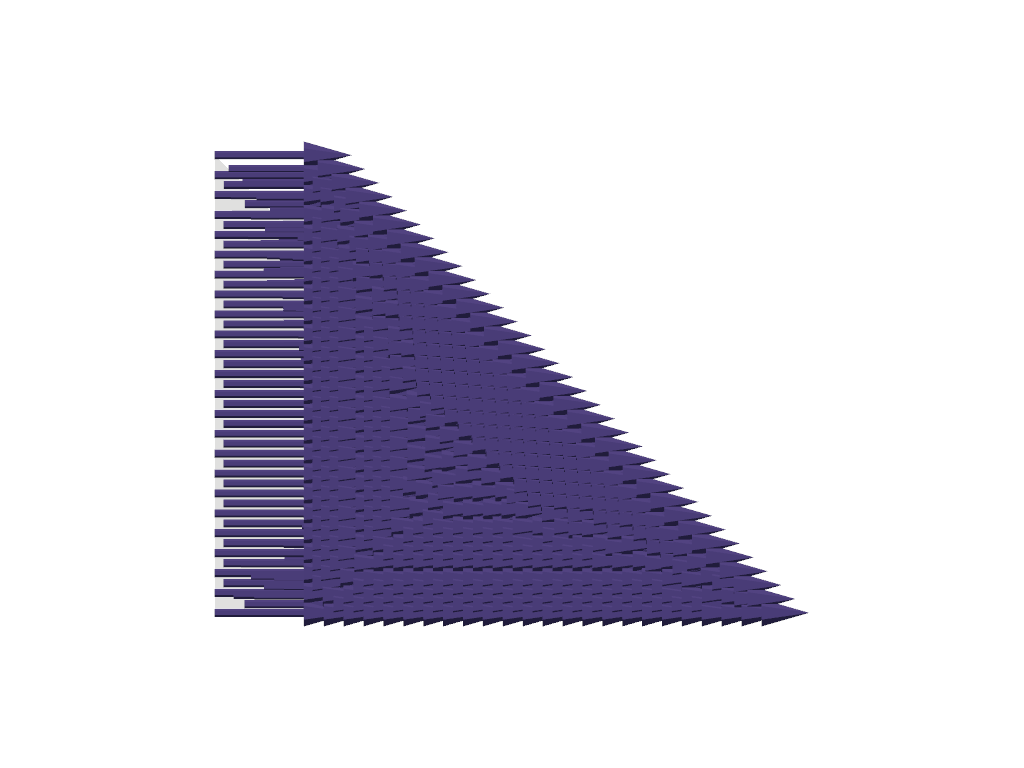

hdiv
['GlyphScale', 'GLOBAL_ID', 'GlyphVector']


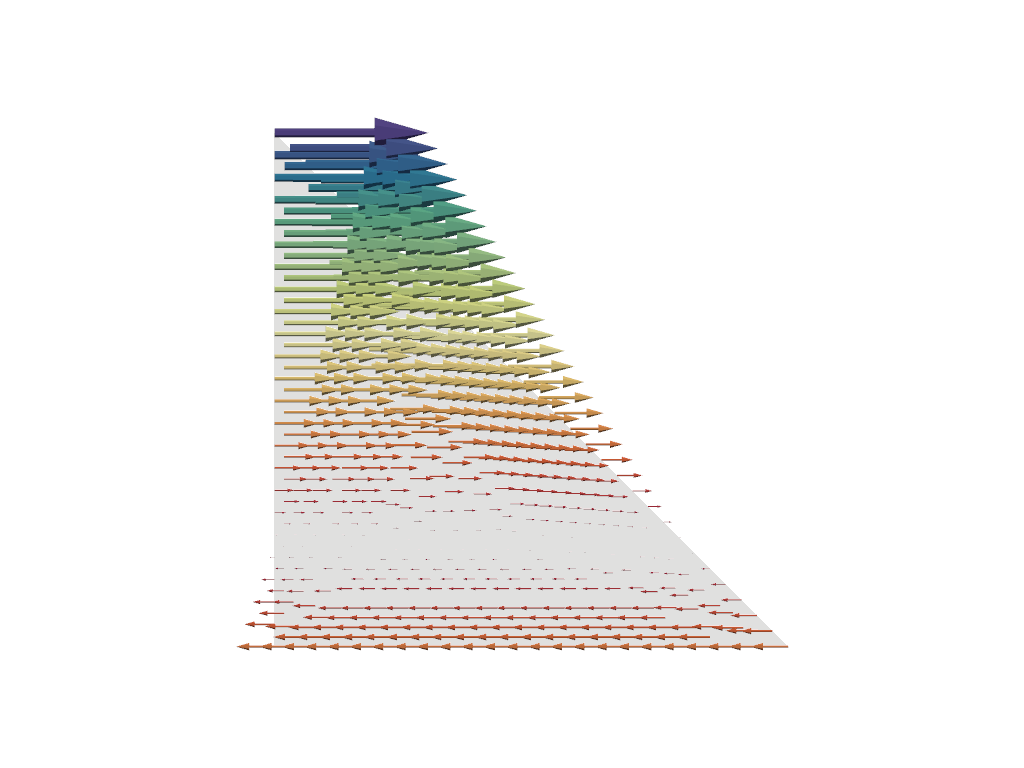

hdiv
['GlyphScale', 'GLOBAL_ID', 'GlyphVector']


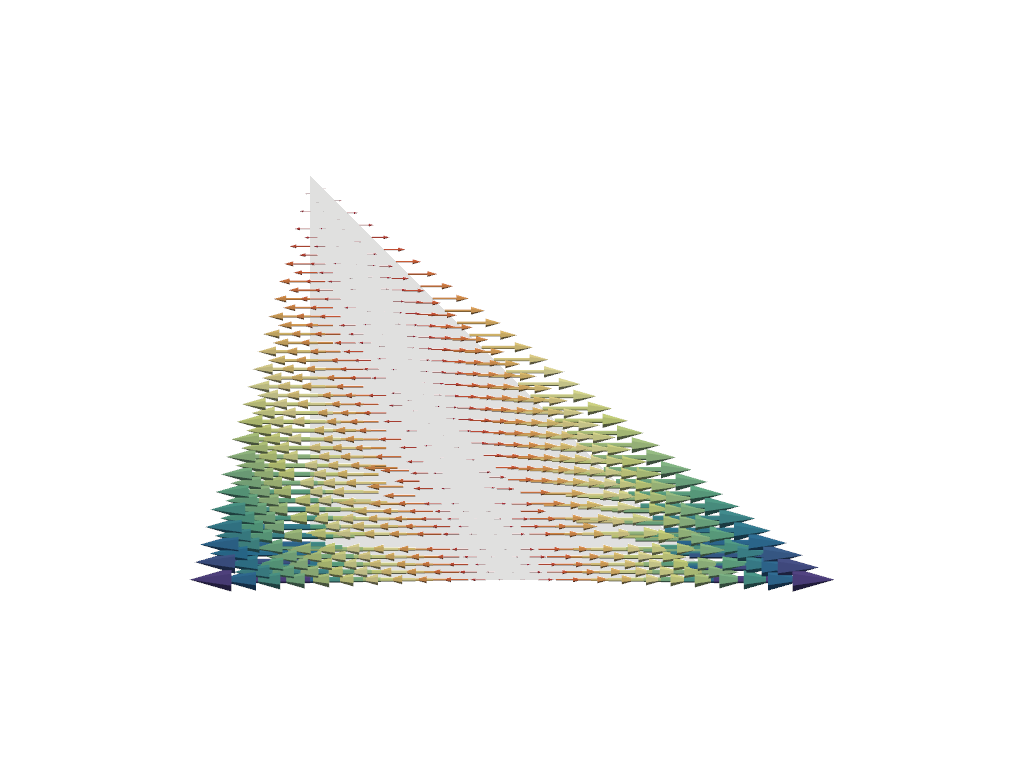

hdiv
['GlyphScale', 'GLOBAL_ID', 'GlyphVector']


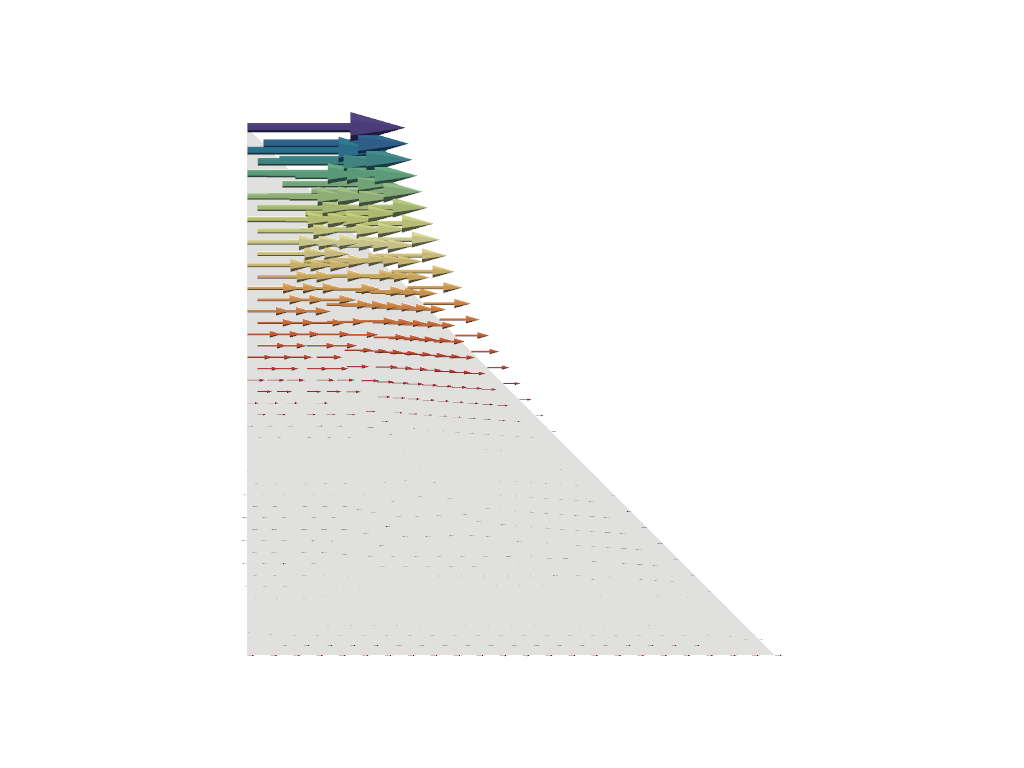

hdiv
['GlyphScale', 'GLOBAL_ID', 'GlyphVector']


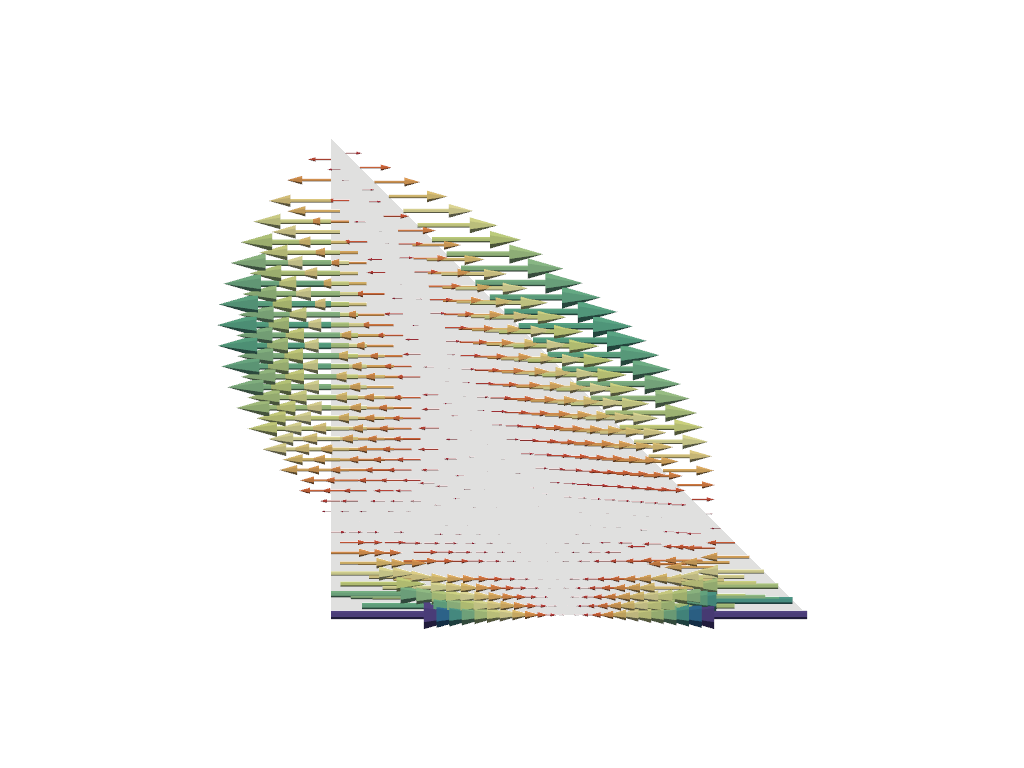

hdiv
['GlyphScale', 'GLOBAL_ID', 'GlyphVector']


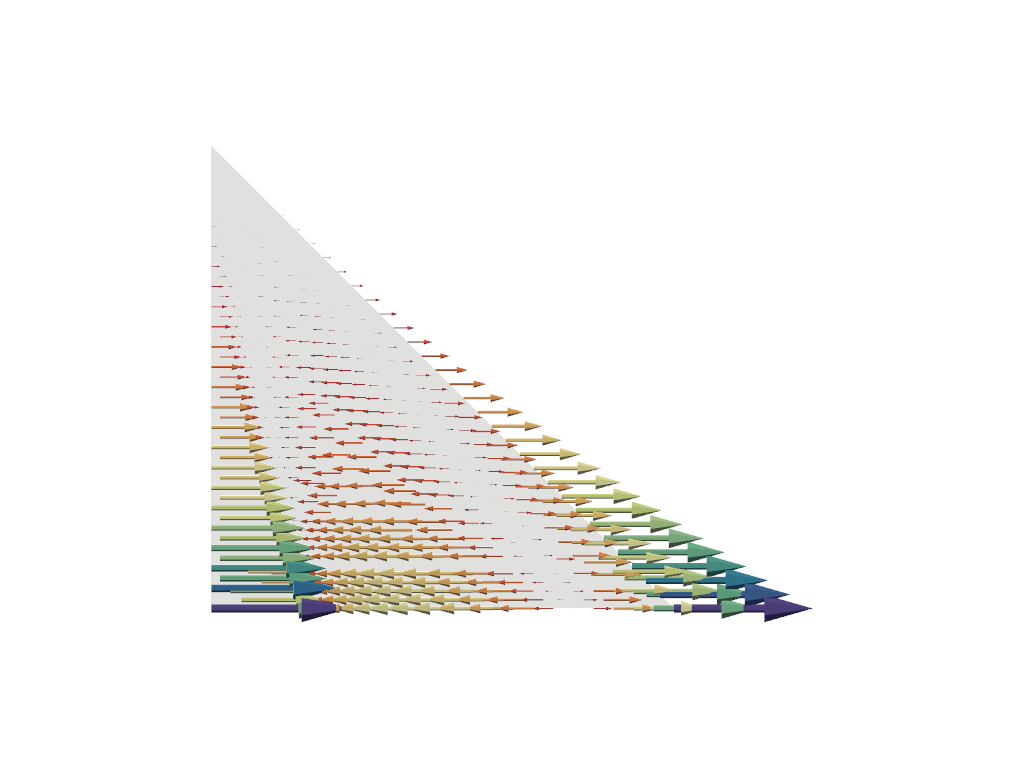

In [45]:
for i in range(0, len(vtks)):
    params.show_file = vtks[i][:-3]
    params.p_save = "shape_"+ str(i) +".pdf"
    print(space)
    if space == 'hcurl' or space == 'hdiv':
        params.p_save = "shape_"+ space + "_" + str(i) +".pdf"
        show_glyphs(params)
    else: 
        params.show_field = "U"
        params.warp_field_scalar = "U" 
        params.component = 1
        # params.p_cmap = "PiYG"
        params.camera_position =  [
            (-2, -2, 3),
            (0.35, 0.35, 0),
            (0.25, 0.25, 1),
        ]

        zoom_factor = 0.4  # Adjust this value to your needs

        camera_position = params.camera_position

        # Calculate the new camera position
        new_camera_position = [
            camera_position[0][0] + (camera_position[1][0] - camera_position[0][0]) * zoom_factor,
            camera_position[0][1] + (camera_position[1][1] - camera_position[0][1]) * zoom_factor,
            camera_position[0][2] + (camera_position[1][2] - camera_position[0][2]) * zoom_factor,
        ]

        params.camera_position = [new_camera_position, camera_position[1], camera_position[2]]

        params.clim = [-1, 1]
        params.warp_factor = 0.5
        params.p_save = "shape_"+ space + "_" + str(i) +".pdf"
        show_results(params)